# Getting Data into Python

## Agenda
* Network / HTTP concepts
* REST API concepts
* Calling APIs with Python
* Web Scraping with BeautifulSoup
* Connecting to Databases
* Other data sources

## Getting Data from the Web

## Network Fundamentals
* Networks communicate messages between **clients** and **servers**
* Many different protocols throughout history
* Dominant protocol today is **TCP/IP**
* Web requests use **HyperText Transfer Protocol (HTTP)**

# OSI Network Model![OSI Model](images/osi.png)

### HyperText Transfer Protocol
- This is the way our web browsers work!
- Replaced older network protocols like gopher
- Development of HTTP was initiated by Tim Berners-Lee at CERN in 1989
- HTTP is a text-based protocol (not binary)
- HTTP is *stateless* - every request must contain all contextual info!
- HTTPS is simply HTTP over SSL (Secure Socket Layer) so that requests and responses are encrypted from client to server and back (but beware of DNS leaks!)
- HTTP 1.1 Specification (good luck!): https://tools.ietf.org/html/rfc7231

# HTTP Request
![Network Request](images/client_server.png)

In [1]:
!curl -v https://xkcd.com/

*   Trying 151.101.192.67...
* TCP_NODELAY set
* Connected to xkcd.com (151.101.192.67) port 443 (#0)
* ALPN, offering h2
* ALPN, offering http/1.1
* Cipher selection: ALL:!EXPORT:!EXPORT40:!EXPORT56:!aNULL:!LOW:!RC4:@STRENGTH
* successfully set certificate verify locations:
*   CAfile: /etc/pki/tls/certs/ca-bundle.crt
  CApath: none
* TLSv1.2 (OUT), TLS header, Certificate Status (22):
* TLSv1.2 (OUT), TLS handshake, Client hello (1):
* TLSv1.2 (IN), TLS handshake, Server hello (2):
* TLSv1.2 (IN), TLS handshake, Certificate (11):
* TLSv1.2 (IN), TLS handshake, Server key exchange (12):
* TLSv1.2 (IN), TLS handshake, Server finished (14):
* TLSv1.2 (OUT), TLS handshake, Client key exchange (16):
* TLSv1.2 (OUT), TLS change cipher, Change cipher spec (1):
* TLSv1.2 (OUT), TLS handshake, Finished (20):
* TLSv1.2 (IN), TLS change cipher, Change cipher spec (1):
* TLSv1.2 (IN), TLS handshake, Finished (20):
* SSL connection using TLSv1.2 / ECDHE-RSA-AES128-GCM-SHA256
* ALPN, server accept

-v is for verbose

### HTTP Request components
- URL
- Verb
- Headers (optional)
- Body (optional)

### HTTP Response components
- Status Code
- Headers (optional)
- Body (optional)

### HTTP Status Code Categories
- 1xx Informational
- 2xx Success
- 3xx Redirection
- 4xx Client Error / Invalid Request (User's Fault)
- 5xx Server Error (Server's Fault)

### Common REST Status Code meanings

#### 2xx
- 200 "OK" - General Success (often overused)
- 201 "Created" - Created a new resource on the server (usually from POST)
- 202 "Accepted" - Request was accepted, but may not yet be completed (long process)

#### 3xx
- 301 "Moved Permanently" - URL for a resource was changed
- 302 "Found" - The resource was found at another URL (temporary redirect, "canonical" URLs)
- 303 "See Other" - Often the same as a 302
- 304 "Not Modified" - Resource has not changed since the last request, use cached value

#### 4xx
- 400 "Bad Request" - Malformed requests, bad parameters, invalid formats
- 401 "Unauthorized" - The resource requires credentials to access (i.e. requires login)
- 403 "Forbidden" - The client does not have permission to access the resource
- 404 "Not Found" - No resource located at this URL
- 409 "Conflict" - Cannot edit the resource due to a conflict
- 429 "Too Many Requests" - Used for API rate limiting

#### 5xx
- 500 "Internal Server Error" - Generic, "something went wrong" message, might indicate a bug in server code.
- 502 "Bad Gateway" - A load balancer or proxy got no response from a webserver
- 503 "Service Unavailable" - The server is overloaded, or down for maintenance, etc.

## API (Application Programming Interface)
* Interface specifically design for code to interact with
* No one specification for APIs - it depends on who authors it
* Network APIs can be binary or text, public or private, synchronous or asynchrous (and more)
* HTTP-based APIs ("web services") have many forms - WDSL, SOAP, proprietary

## REST APIs
* __RE__presentational __S__tate __T__ransfer
* Aims to use HTTP "as intended" to build the API
* Familiar tools:
    * URI (URL) uniquely identifies a "resource"
    * HTTP verbs define what action is intended
    * Status codes (200, 404, 500, etc) communicate results
    * Headers provide extra info (data formats, encoding, compression)
* Not a standard!
    * Any data format - JSON, XML, CSV, plain text
    * Any "resource" - Author's choice (read the docs!)

| HTTP Method | Description | "CRUD" Action | Request Body | Response Body | Only Reads | Idempotent | Cacheable |
| --- | --- | --- | --- | --- | --- | --- | --- |
| **GET** | Retrieve a resource | Read | Optional | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> |
| **HEAD** | Retrieve headers for a resource | Read | Optional | <span style="color: red;">No</span> | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> |
| **POST** | Post data for a resource | Create | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: red;">No</span> | <span style="color: red;">No</span> | <span style="color: green;">Yes</span> |
| **PUT** | Post data (replace) and existing resource | Update | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: red;">No</span> | <span style="color: green;">Yes</span> | <span style="color: red;">No</span> |
| **DELETE** | Delete a resource | Delete | Optional | <span style="color: green;">Yes</span> | <span style="color: red;">No</span> | <span style="color: green;">Yes</span> | <span style="color: red;">No</span> |
| **CONNECT** | Convert connection to a tunnel | N/A | Optional | <span style="color: green;">Yes</span> | <span style="color: red;">No</span> | <span style="color: red;">No</span> | <span style="color: red;">No</span> |
| **OPTIONS** | Request the supported methods for a resource | N/A | Optional | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: red;">No</span> |
| **TRACE** | Echo a client request for testing | N/A | <span style="color: red;">No</span> | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: red;">No</span> |
| **PATCH** | Update a resource with partial data | Update | <span style="color: green;">Yes</span> | <span style="color: green;">Yes</span> | <span style="color: red;">No</span> | <span style="color: red;">No</span> | <span style="color: red;">No</span> |





### Request / Response Bodies
- The HTTP Specification does not address the format of the body
- Requests and Responses can be sent in any format that both support
- Common formats:  HTML, plain text, JSON, XML, YAML, etc.
- See the **Accept** and **Content-Type** headers (and the API docs!)

### Request / Response Headers

- Headers are just key/value pairs (remind you of anything?)
- Values are always just text
- Many standard headers, but some APIs may add custom ones

#### Common Headers

- **Location:** Specify location of requested resource  
  Example: `Location: http://www.google.com`  
- **Content-Type:** Format of the request body  
  Example: `Content-Type: application/json`
- **Accept:** Tells the server which body format to return  
  Example: `Accept: application/xml`
- **User Agent:** Information about the application sending the request  
  Example: `User-Agent: curl/7.58.0`
- **Cookies:** Misc key-value pairs stored at the client and resent on each request  
  Example: `set-cookie: NID=212=v2D4SUIJMhZuI9NWCSmaxWXm0KP01ydT-3ptgttKK3E0dn8_CoixMhU3ql1JotoZ79UbRTDThg7c9APBoipLJjSdLv0H4CLmz7ozxzzqf57Pel4bohmWDpuFcBYT7_h58lkm4-x3OPnZo09bxOJw-LJQGWkurHOnJHioz21Sd30; expires=Sat, 02-Oct-2021 12:09:52 GMT; path=/; domain=.google.com; HttpOnly`

## Lab:  HTTP Requests
Using the `curl` Linux command line tool (install it with yum if you don't have it), make some web requests to sites you know.  Use the `-v` option (verbose) to see the details of the request and response, and identify the HTTP Method, URL, and Headers.

**Bonus:** Using the curl man page (or web search), find out how to send different HTTP Methods with `curl` and try a few out, even those you know may not work, to see what responses you get.

## REST APIs in Python

## To talk to a REST API in Python, we need to:
* Make a web request
* Parse the information it gives us
* Luckily, Python gives us both in the standard library!

## urllib: Package of modules for making and dealing with HTTP

In [2]:
from urllib.request import urlopen
SECRET_KEY = '1d8c58ed1d54f96f939e706c788650f1'

lat, long = (33.8840,-84.5144)  # Smyrna, GA

url = 'https://api.darksky.net/forecast/{key}/{lat},{long}'.format(
    key=SECRET_KEY, lat=lat, long=long)
response = urlopen(url)  # Defaults to a GET request
# Returns a file-like Response object, so we can read it just like File I/O
print(response)
print(dir(response))

['__abstractmethods__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_abc_impl', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_check_close', '_close_conn', '_get_chunk_left', '_method', '_peek_chunked', '_read1_chunked', '_read_and_discard_trailer', '_read_next_chunk_size', '_read_status', '_readall_chunked', '_readinto_chunked', '_safe_read', '_safe_readinto', 'begin', 'chunk_left', 'chunked', 'close', 'closed', 'code', 'debuglevel', 'detach', 'fileno', 'flush', 'fp', 'getcode', 'getheader', 'getheaders', 'geturl', 'headers', 'info', 'isatty', 'isclosed', 'length', 'msg', 'peek', 'read', 'read1', 'readable', 'readinto', 

In [3]:
forecast_data = response.read()
print(forecast_data)

b'{"latitude":33.884,"longitude":-84.5144,"timezone":"America/New_York","currently":{"time":1617983073,"summary":"Mostly Cloudy","icon":"partly-cloudy-day","nearestStormDistance":47,"nearestStormBearing":220,"precipIntensity":0,"precipProbability":0,"temperature":73.42,"apparentTemperature":73.74,"dewPoint":62.9,"humidity":0.7,"pressure":1014.5,"windSpeed":5.06,"windGust":9.36,"windBearing":151,"cloudCover":0.77,"uvIndex":4,"visibility":10,"ozone":323.5},"minutely":{"summary":"Mostly cloudy for the hour.","icon":"partly-cloudy-day","data":[{"time":1617983040,"precipIntensity":0,"precipProbability":0},{"time":1617983100,"precipIntensity":0,"precipProbability":0},{"time":1617983160,"precipIntensity":0,"precipProbability":0},{"time":1617983220,"precipIntensity":0,"precipProbability":0},{"time":1617983280,"precipIntensity":0,"precipProbability":0},{"time":1617983340,"precipIntensity":0,"precipProbability":0},{"time":1617983400,"precipIntensity":0,"precipProbability":0},{"time":1617983460,"

## json: Parsing and creating JSON-formatted data

In [4]:
import json

msg = json.loads('{"language": "en", "name": "Fred", "color": "blue"}')
print(msg, type(msg))
print(msg['color'])

msg['color'] = 'green'
s = json.dumps(msg)
print(s, type(s))

{'language': 'en', 'name': 'Fred', 'color': 'blue'} <class 'dict'>
blue
{"language": "en", "name": "Fred", "color": "green"} <class 'str'>


In [5]:
forecast = json.loads(forecast_data)
# Depending on the API, this can get really deep!  Consider breaking things down
print(type(forecast))
time = forecast['currently']['time']
temp = forecast['currently']['temperature']
print(time, temp)

today = forecast['daily']['data'][0]

print('Today - High: {high}, Low: {low}'.format(
    high=today['temperatureHigh'], low=today['temperatureLow']))

<class 'dict'>
1617983073 73.42
Today - High: 79.32, Low: 60.73


In [6]:
from pprint import pprint
pprint(forecast)

{'currently': {'apparentTemperature': 73.74,
               'cloudCover': 0.77,
               'dewPoint': 62.9,
               'humidity': 0.7,
               'icon': 'partly-cloudy-day',
               'nearestStormBearing': 220,
               'nearestStormDistance': 47,
               'ozone': 323.5,
               'precipIntensity': 0,
               'precipProbability': 0,
               'pressure': 1014.5,
               'summary': 'Mostly Cloudy',
               'temperature': 73.42,
               'time': 1617983073,
               'uvIndex': 4,
               'visibility': 10,
               'windBearing': 151,
               'windGust': 9.36,
               'windSpeed': 5.06},
 'daily': {'data': [{'apparentTemperatureHigh': 78.82,
                     'apparentTemperatureHighTime': 1617998460,
                     'apparentTemperatureLow': 61.45,
                     'apparentTemperatureLowTime': 1618052400,
                     'apparentTemperatureMax': 78.82,
             

                     'humidity': 0.48,
                     'icon': 'cloudy',
                     'moonPhase': 0.09,
                     'ozone': 310.3,
                     'precipIntensity': 0.0003,
                     'precipIntensityMax': 0.0018,
                     'precipIntensityMaxTime': 1618372800,
                     'precipProbability': 0.04,
                     'precipType': 'rain',
                     'pressure': 1015,
                     'summary': 'Overcast throughout the day.',
                     'sunriseTime': 1618398540,
                     'sunsetTime': 1618445400,
                     'temperatureHigh': 76.35,
                     'temperatureHighTime': 1618430220,
                     'temperatureLow': 54.76,
                     'temperatureLowTime': 1618484400,
                     'temperatureMax': 76.35,
                     'temperatureMaxTime': 1618430220,
                     'temperatureMin': 57.24,
                     'temperatureMinTime': 1618

                      'visibility': 10,
                      'windBearing': 174,
                      'windGust': 12.13,
                      'windSpeed': 7.37},
                     {'apparentTemperature': 77.87,
                      'cloudCover': 0.65,
                      'dewPoint': 57.06,
                      'humidity': 0.49,
                      'icon': 'partly-cloudy-day',
                      'ozone': 314.4,
                      'precipIntensity': 0.0021,
                      'precipProbability': 0.04,
                      'precipType': 'rain',
                      'pressure': 1012.7,
                      'summary': 'Mostly Cloudy',
                      'temperature': 77.87,
                      'time': 1617994800,
                      'uvIndex': 5,
                      'visibility': 10,
                      'windBearing': 172,
                      'windGust': 13,
                      'windSpeed': 8.57},
                     {'apparentTemperature': 78.82,
 

                        'precipProbability': 0,
                        'time': 1617986580},
                       {'precipIntensity': 0,
                        'precipProbability': 0,
                        'time': 1617986640}],
              'icon': 'partly-cloudy-day',
              'summary': 'Mostly cloudy for the hour.'},
 'offset': -4,
 'timezone': 'America/New_York'}


In [7]:
request_data = {
    'id': 123,
    'name': 'JR',
    'tasks': [
        {
            'id': 123,
            'description': 'Update notes'
        }
    ]
}

print(json.dumps(request_data))

{"id": 123, "name": "JR", "tasks": [{"id": 123, "description": "Update notes"}]}


In [ ]:
request_data = {}

request_data['tasks'] = []
for i in range(10)
    request_data['tasks'].append({'id': i, 'description': 'Some description'})

# Advanced API tools:  Requests
* Requests - HTTP for Humans:  http://docs.python-requests.org/en/master/
* Nice methods for each HTTP verb
* Easy response handling for most common data formats
* Can handle cookies, authentication, streaming downloads
* Lots of community support for advanced usage:  OAuth, Caching, Async

In [ ]:
import requests111

In [8]:
!pip3 install requests
# OR python3 -m pip install requests

In [9]:
import requests
response = requests.get('https://xkcd.com')
print(response.text)
print(response.headers)
print(response.status_code)

<!DOCTYPE html>
<html>
<head>
<link rel="stylesheet" type="text/css" href="/s/7d94e0.css" title="Default"/>
<title>xkcd: Hammer Incident</title>
<meta http-equiv="X-UA-Compatible" content="IE=edge"/>
<link rel="shortcut icon" href="/s/919f27.ico" type="image/x-icon"/>
<link rel="icon" href="/s/919f27.ico" type="image/x-icon"/>
<link rel="alternate" type="application/atom+xml" title="Atom 1.0" href="/atom.xml"/>
<link rel="alternate" type="application/rss+xml" title="RSS 2.0" href="/rss.xml"/>
<script type="text/javascript" src="/s/b66ed7.js" async></script>
<script type="text/javascript" src="/s/1b9456.js" async></script>

<meta property="og:site_name" content="xkcd">

<meta property="og:title" content="Hammer Incident">
<meta property="og:url" content="https://xkcd.com/2447/">
<meta property="og:image" content="https://imgs.xkcd.com/comics/hammer_incident_2x.png">
<meta name="twitter:card" content="summary_large_image">

</head>
<body>
<div id="topContainer">
<div id="topLeft">
<ul>
<

In [10]:
help(requests.get)

Help on function get in module requests.api:

get(url, params=None, **kwargs)
    Sends a GET request.
    
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



## Common API Response formats

## CSV (Comma-Separated Values) / Delimited text
* One of the simplest forms of data transfer formats
* Often simply a direct dump from a database or spreadsheet
* Very efficient data transfer (little metadata)
* Popular in government data sources and data science
* Has a few problems that make it less popular on the client side
    * No data type support - everything is a string
    * Delimeters in text need to be handled specially (usually quoting)
    * There are several subtley different "dialects" from various tools (no real specification)
    * Not terribly human-readable either

In [13]:
import requests
import csv

# Hourly earthquake data for earthquakes over 1.0 magnitude, per USGS
response = requests.get('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_hour.csv')
print(response.text)
print(response.headers)
# Sometimes we have to deal with different data encodings (ASCII, UTF-8, etc.)
reader = csv.DictReader(response.iter_lines(decode_unicode=True))
print(reader.fieldnames)
for row in reader:
    print(row['time'], row['place'], row['mag'])

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2021-04-09T17:02:53.090Z,37.4555016,-118.8483353,4.29,1.85,md,21,151,0.1352,0.04,nc,nc73547295,2021-04-09T17:17:07.749Z,"19km SW of Toms Place, CA",earthquake,0.33,2.06,0.12,22,automatic,nc,nc
2021-04-09T16:36:46.840Z,35.6448333,-117.4335,1.99,1.21,ml,13,160,0.1322,0.16,ci,ci39844704,2021-04-09T16:40:24.798Z,"14km S of Searles Valley, CA",earthquake,0.89,1.98,0.157,11,automatic,ci,ci

{'Content-Type': 'text/csv; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Date': 'Fri, 09 Apr 2021 17:27:37 GMT', 'Server': 'Apache', 'Cache-Control': 'public, max-age=60', 'Expires': 'Fri, 09 Apr 2021 17:28:37 GMT', 'Last-Modified': 'Fri, 09 Apr 2021 17:27:37 GMT', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': '*', 'Access-Control-Allow-Headers': 'accept,origin,authorization,content-type', 'X-Fr

## XML (eXtensible Markup Language)
* Became popular as the Web took off (late 1990s)
* Intended to be very easy for humans to read (compared to binary formats)
* Text only - once again to avoid prior binary protocols
* No data types - everything is a string
* Very verbose format - not great efficiency for very large files
* Not really streamable (there are workarounds)
* Official spec (but there are many extensions): like kml below
* Still very popular as a configuration format (C#, Java, etc)

In [15]:
import requests
from xml.etree import ElementTree as ET

response = requests.get('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week_age_link.kml')

print(response.text)
print()
root = ET.fromstring(response.text)
print(root.tag)
document = root.find('{http://www.opengis.net/kml/2.2}Document')
for child in document: # gives each node
    print(child.tag)
    print(child.text)

<?xml version="1.0" encoding="UTF-8"?>
<kml xmlns="http://www.opengis.net/kml/2.2"><Document><name>Earthquakes</name><visibility>1</visibility><open>1</open><LookAt><longitude>-100</longitude><latitude>39</latitude><range>4000000</range><tilt>0</tilt><heading>0</heading></LookAt><NetworkLink><visibility>1</visibility><refreshVisibility>0</refreshVisibility><open>1</open><name>USGS Magnitude 1.0+ Earthquakes, Past Week</name><Snippet maxLines="1">Updates every 1 minutes</Snippet><Link><href>https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week_age.kml</href><refreshMode>onInterval</refreshMode><refreshInterval>60</refreshInterval></Link></NetworkLink><NetworkLink><name>Tectonic Plates</name><visibility>0</visibility><refreshVisibility>0</refreshVisibility><Link><href>https://earthquake.usgs.gov/learn/plate-boundaries.kmz</href></Link></NetworkLink></Document></kml>

{http://www.opengis.net/kml/2.2}kml
{http://www.opengis.net/kml/2.2}name
Earthquakes
{http://www.opengis.net/

## JSON (JavaScript Object Notation)
* Syntax is valid, literal JavaScript objects
* Gained rapid popularity because it is simple concise, and easy to deal with in JavaScript
* Translates easily to Python objects
* Still pretty human readable
* Supports a limited set of data types (number, string, boolean, "object", and array)
* Has an official specification:  https://www.json.org/json-en.html

In [16]:
import requests

response = requests.get('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_hour.geojson')

data = response.json()
print(data)
print()
for record in data['features']:
    print(record['properties']['time'], record['properties']['place'], record['properties']['mag'])

{'type': 'FeatureCollection', 'metadata': {'generated': 1617989764000, 'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_hour.geojson', 'title': 'USGS Magnitude 1.0+ Earthquakes, Past Hour', 'status': 200, 'api': '1.10.3', 'count': 3}, 'features': [{'type': 'Feature', 'properties': {'mag': 1.06, 'place': '5km NNE of Fontana, CA', 'time': 1617989159630, 'updated': 1617989385950, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ci39844792', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ci39844792.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 17, 'net': 'ci', 'code': '39844792', 'ids': ',ci39844792,', 'sources': ',ci,', 'types': ',nearby-cities,origin,phase-data,scitech-link,', 'nst': 17, 'dmin': 0.1113, 'rms': 0.19, 'gap': 87, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 1.1 - 5km NNE of Fontana, CA'}, 'geometry': {'type': 'Point', 'coordinates': [-117.4335,

Can also set up like this:
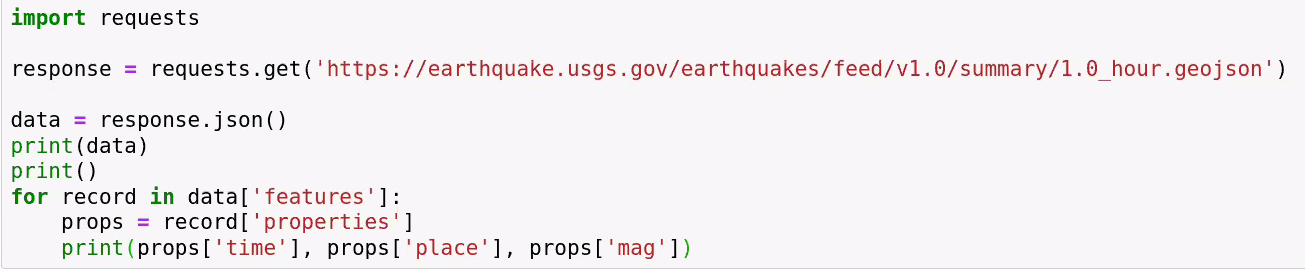

## Lab: API Requests

* Using the `requests` package, and the API key above, write a function that makes a request for your own location to the DarkSky API, and print out the response data.

In [32]:
import requests

SECRET_KEY = '1d8c58ed1d54f96f939e706c788650f1'

lat, long = (47.9543,-117.4769)  # Smyrna, GA

response = requests.get('https://api.darksky.net/forecast/{key}/{lat},{long}'.format(
    key=SECRET_KEY, lat=lat, long=long))

response1 = response.json()  

print(response1)
print()

#forecast_data = response
#print(forecast_data)

#forecast= json.loads(response)
#print(type(forecast))

#time = forecast['currently']['time']
#temp = forecast['currently']['temperature']
#print(time, temp)

#today = forecast['daily']['data'][0]

#print('Today - High: {high}, Low: {low}'.format(
#    high=today['temperatureHigh'], low=today['temperatureLow']))

{'latitude': 47.9543, 'longitude': -117.4769, 'timezone': 'America/Los_Angeles', 'currently': {'time': 1617994172, 'summary': 'Partly Cloudy', 'icon': 'partly-cloudy-day', 'nearestStormDistance': 51, 'nearestStormBearing': 0, 'precipIntensity': 0, 'precipProbability': 0, 'temperature': 47.64, 'apparentTemperature': 42.74, 'dewPoint': 24.55, 'humidity': 0.4, 'pressure': 1018.5, 'windSpeed': 10.33, 'windGust': 15.22, 'windBearing': 196, 'cloudCover': 0.46, 'uvIndex': 4, 'visibility': 10, 'ozone': 332.1}, 'minutely': {'summary': 'Partly cloudy for the hour.', 'icon': 'partly-cloudy-day', 'data': [{'time': 1617994140, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1617994200, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1617994260, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1617994320, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1617994380, 'precipIntensity': 0, 'precipProbability': 0}, {'time': 1617994440, 'precipIntensity': 0, 'precipProbabili

## Other API concerns
* Not all APIs are RESTful - you may need to deal with a proprietary protocol or simply request files
* Authorization - many APIs require keys, tokens, or other credentials
* Network outages
* Rate limiting, tiering of access

## But what if the site or web app doesn't offer an API?

# Web Scraping

### Requesting web pages built to render displays for HUMANS and extracting the information we want

## Why should web scraping be a fallback?
* More manual trial and error up front
* Pages meant for humans may change frequently for any reason
* Pages meant for display may have data scattered or buried
* Popularity of Javascript frameworks may make data even harder to find

## BeautifulSoup - Python package for parsing HTML
* Offers support for various parsers (html, xml, lxml)
* Provides easy methods and properties for navigating the markup "tree"
* Search by HTML tags, attributes, CSS class, etc.
* Regular expression support

In [33]:
import requests
import bs4

response = requests.get('https://cnn.com')
soup = bs4.BeautifulSoup(response.text)
soup

ModuleNotFoundError: No module named 'bs4'

In [ ]:
soup.title

In [ ]:
soup.body.div

In [ ]:
for child in soup.body.children:
    print(child)

In [ ]:
soup.find_all('a')

## That's a mess - but sometimes we can cheat a little...

In [ ]:
response = requests.get('http://rss.cnn.com/rss/cnn_topstories.rss')
soup = bs4.BeautifulSoup(response.text)

soup.rss.find_all('title')

In [ ]:
headlines = [node.string for node in soup.rss.find_all('title')]
headlines

## Bonus Lab:  Web Scraping

Using BeautifulSoup4, scrap the Wikipedia page for the History Python to obtain the following information:
* What is the sum total length of support time for each major version of Python (i.e. 0.x, 1.x, 2.x, 3.x)
* How much time was each major version supported after the next major version appeared?
* Display the list of the final version for each major version

## Python and Databases

## DBAPI2:  The Python way to handle databases

DBAPI2 is an API specification (https://www.python.org/dev/peps/pep-0249/) that defines a set of Python objects that are available when querying database engines.  While there are a very large number of database engines, and several database connectivity standards (ODBC, JDBC, etc), the DBAPI2 objects are what you see on the Python side.

DBAPI2 **is**:
* A common interface in Python that makes it simpler to switch databases
* Provided by Python database driver packages
* Simple and straightforward

DBAPI2 **is not**:
* A translation layer for SQL queries
* An Object-Relational Mapper
* A Python implementation of any database-specific features

## `sqlite3` - The built-in database
* Open-source database engine
* Simple file-based storage
* Great for prototyping
* SQL compliant (almost)
* Does NOT support parallel access (don't put it in production web apps!)

In [34]:
query = """
CREATE TABLE users (user_id INTEGER, username TEXT, email TEXT, pto_days REAL)
"""

In [35]:
import sqlite3

# "Connect" to the database
conn = sqlite3.connect('example.db')

# Get a cursor from the connection
cursor = conn.cursor()

# Execute a SQL query
cursor.execute(query)

# Inspect the results, if any
result = cursor.fetchone()
print(result)


# Commit the changes
conn.commit()
# Close the connection
conn.close()

None


In [36]:
!ls -al *.db

-rw-r--r-- 1 CORP\kwhitley CORP\domain users 2048 Apr 12 10:48 example.db


In [37]:
insert_query = """
INSERT INTO users
VALUES
(1, "jrrickerson", "jrrickerson@redrivetstudios.com", 15.0),
(2, "dave", "dws@developintelligence.com", 20.0),
(3, "ace", "ace@developintelligence.com", 11.5);
"""

conn = sqlite3.connect('example.db')
cursor = conn.cursor()
cursor.execute(insert_query)
result = cursor.fetchone()
print(result)

conn.commit()
conn.close()

None


In [39]:
# Support for "with"

with sqlite3.connect('example.db') as conn:
    query = 'SELECT * FROM users'
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall() #Fetchall gives a list and each item in it is a tuple
    print(result)

[(1, 'jrrickerson', 'jrrickerson@redrivetstudios.com', 15.0), (2, 'dave', 'dws@developintelligence.com', 20.0), (3, 'ace', 'ace@developintelligence.com', 11.5)]


In [40]:
# Cursors support iteration

with sqlite3.connect('example.db') as conn:
    query = 'SELECT * FROM users'
    cursor = conn.cursor()
    for row in cursor.execute(query):
        print(row[1], row[3])

jrrickerson 15.0
dave 20.0
ace 11.5


In [41]:
# Row objects allow column lookups

with sqlite3.connect('example.db') as conn:
    query = 'SELECT * FROM users'
    conn.row_factory = sqlite3.Row
    cursor = conn.cursor()
    cursor.execute(query)
    for row in cursor:
        print(row['username'], row['pto_days'])
    print(row.keys())

jrrickerson 15.0
dave 20.0
ace 11.5
['user_id', 'username', 'email', 'pto_days']


In [42]:
query = """
INSERT INTO users
VALUES
    (?, ?, ?, ?)"""

In [ ]:
username = input('Enter username: ')
email = input('Enter email: ')
userid = input('Enter ID: ')
days = input('Enter PTO: ')

In [ ]:
with sqlite3.connect('example.db') as conn:
    cursor = conn.cursor()
    cursor.execute(query, (userid, username, email, days))
    for row in cursor.execute('SELECT * from users'):
        print(row)

## Bonus Lab:  DBAPI2

Create your own sqlite3 database (HINT:  You can use the filename `:memory:` if you cannot create a file) and execute some SQL queries on it.  Try creating a table and adding a few rows, and then retrieving those rows.

## More On Databases

- Python has drivers for PostgreSQL, MySQL, MS-SQL, Oracle, and more!
- Additional support for No-SQL databases, but they may not follow the DBAPI2 spec
- If you need to do a LOT of database work, an ORM may help you - look at `sqlalchemy`
- Database connectivity comes with a lot of gotchas!  Be especially careful when executing within loops.  There's often a better way!

## Lab:  Astronomy API Client
Look for the file **01_calling_apis_with_python.pdf** in your materials for instructions, and build your own standlone script that utilizes the Astronomy API at https://astronomyapi.com